**Author**: J W Debelius<br>
**Date**: 25 August 2015<br>
**virtualenv**: power_play

In [1]:
%%javascript
IPython.load_extensions('calico-spell-check', 'calico-document-tools')

<IPython.core.display.Javascript object>

Statistical power measures the probability of finding a significant result of a statistical test, for a given critical value, sample size, and effect size. Traditionally, power has been defined using test-based methods, which have been discussed extensively elsewhere
% \cite{Liu2014}.

Let $\{S_{1}, S_{2}, ... S_{k}\}$ be a set of samples where the $i$th sample contains $N_{i}$ observations and is characterized by a parameter, $X_{i}$. The sample paramter, $X_{i}$ approximates a paramter for the underlying population, $\chi_{i}$. Supposed we wish to test the alternative hypotheses, 

$\begin{matrix}
\textbf{H}_{0} & \chi_{i} = \chi_{j} & \forall \textrm{ }i, j \textrm{ } | \textrm{ }i \neq j,\textrm{ }\{i, j\textrm{ }\epsilon\textrm{ }\mathbb{N},\textrm{ }1\leq i, j \leq k\}\\
\textbf{H}_{1} & \chi_{i} \neq \chi_{j} & \exists\textrm{ }i, j \textrm{ } | \textrm{ }i \neq j,\textrm{ }\{i, j\textrm{ }\epsilon\textrm{ }\mathbb{N},\textrm{ }1\leq i, j \leq k\}\\
\end{matrix}\tag{1}$

There are four possible outcomes of the test. 

We can use a statistical test, $\textbf{F}$, to examine the probability of a false negative. We evaluate $\textbf{F}(S_{1}, S_{2}, ... S_{k}) = a$, where $a$ is drawn from the $A$ distribution with parameters $c$. The probability of a False Negative, $p_{a}$ is $A(a, c)$. We reject $\textbf{H}_{0}$ when $p_{a}$ is less than some predetermined critical value, $\alpha$. So, a statistical test can measure the probability of a false negative.

The probability of a false positive is harder to measure by a direct test. This value is typically defined for each test. When the null hypothesis is true, $a$ is drawn from an $A$ distribution with parameters, $c$. If the alternative hypothesis is true, $a'$ should be drawn from an $A'$ distribution, characterized by parameters $c$ and a noncentrality parameter, $\lambda$. The two-tailed probability of a false negative, $\beta$ is given by equation ().
$\begin{align*}
\beta = P \left [A' < a_{1 - \alpha/2} \right ] - P \left [A' < a_{\alpha/2} \right ]
\end{align*}\tag{2}$

Statistical Power is defined as 
$\begin{align*}
PWR = 1 - \beta
\end{align*}\tag{3}$
which allows us to rewrite equation () as equation ().
$\begin{align*}
PWR &= 1 - \beta\\
&= 1 - \left ( P \left [A' < a_{1 - \alpha/2} \right ] - P \left [A' < a_{\alpha/2} \right ] \right )\\
&= 1 - P \left [A' < a_{1 - \alpha/2} \right ] + P \left [A' < a_{\alpha/2} \right ]\\
&= 1 - \Phi_{A'} \left (a_{1 - \alpha/2}(c), c, \lambda \right ) + \Phi_{A'} \left (a_{\alpha/2}(c), c, \lambda \right )\\
\end{align*}\tag{4}$
Where $\Phi_{A'}$ is the cumulative probability distribution function from the non-central $A$ distribution with non centrality parameter, $\lambda$.

Let's consider for a difference in means between two samples of size $n$ drawn from defined populations with means $\mu_{1}$ and $\mu_{2}$ and the same variance, $\sigma^{2}$. 

$\begin{matrix}
\textbf{H}_{0} & \mu_{1} = \mu_{2}\\
\textbf{H}_{1} & \mu_{1} \neq \mu_{2}\\
\end{matrix}\tag{5}$

We can test these hypotheses using a $Z$ test. For a $Z$ test, the test statistic, $z$ is calculated as
$\begin{align*}
z = \sqrt{\frac{n}{2}}\frac{\left (\mu_{1} - \mu_{2}\right )}{\sigma}
\end{align*}\tag{6}$

If the alternative hypothesis is true, the noncentrality parameter, $\lambda_{z}$ is given by
$\begin{align*}
\lambda_{z} = \left ( \frac{\mu_{1} - \mu_{2}}{\sigma} \right )\sqrt{\frac{n}{2}}
\end{align*}\tag{7}$

The power, as described by equation () can be calculating by substituting in equations (), ().

$\begin{align*}
PWR &= 1 - \Phi_{Z'}\left (z_{1 - \alpha/2}, \lambda_{z} \right ) + \Phi_{Z'} \left (z_{\alpha/2}, \lambda_{z} \right )\\
&= \Phi_{Z} \left (\lambda_{z} - z_{1 - \alpha/2} \right ) + \Phi_{Z} \left ( z_{\alpha/2} - \lambda_{z} \right )\\
&= \Phi_{Z} \left (\sqrt{\lambda_{z}^{2}} - z_{1 - \alpha/2} \right )
\end{align*}\tag{8}$

We can use equations (), (), and () to say that for a two-tailed test,
$\begin{align*}
1 - \beta &= \Phi_{Z} \left (\sqrt{\lambda_{z}^{2}} - z_{1 - \alpha/2} \right )\\
z_{1 - \beta} &= \sqrt{\lambda_{z}^{2}} - z_{1 - \alpha/2}\\
z_{1 - \beta} + z_{1 - \alpha/2} &= \sqrt{\frac{n}{2}\left (\frac{\mu_{1} - \mu_{2}}{\sigma} \right )^{2}}\\
\end{align*}\tag{9}$

Cohen defined the standard effect size, $\delta$ for a Z test as equation ().
$\begin{align*}
\delta_{z} = \frac{\mu_{1} - \mu_{2}}{\sigma}
\end{align*}\tag{10}$

We can substitute $\delta_{z}$ into equation (\ref{eq:sub_pwr}), which lets us approximate the effect size as a function of the power and number of observations.
$\begin{align*}
z_{1 - \beta} + z_{1 - \alpha/2} = \sqrt{\frac{\delta_{z}^{2}n}{2}}
\end{align*}\tag{11}$
$\begin{align*}
\delta_{z} = \sqrt{\frac{2 \left (z_{1 - \beta} + z_{1 - \alpha/2} \right )^{2}}{n}}
\end{align*}\tag{12}$

We can estimate a pseudo effect size, $\widehat{\delta}_{x}$, based on the z distribution and equation ().

In [1]:
import numpy as np
import scipy.stats as stats
import scipy.special as sp
import absloute_power.traditional as trad

from scipy.stats import norm as Z

We're going to test the function of equation (12), and compare it to the effect size we see with the original power, and empricial power.

In [2]:
def estimate_z_effect(count, power, alpha=0.05):
    z_diff = Z.ppf(power) + Z.ppf(1 - alpha/2)
    eff = np.sqrt(2 * np.square(z_diff) / counts)
    return eff

In [155]:
def power_from_effect(count, eff, alpha=0.05):
    return (Z.cdf(eff * np.sqrt(counts) - Z.ppf(1 - alpha/2)) 
            + (Z.cdf(Z.ppf(alpha/2) - eff * np.sqrt(counts))))

In [156]:
def get_cohen(sample1, sample2):
    x1, s1, n1 = sample1.mean(), sample1.std(), len(sample1)
    x2, s2, n2 = sample2.mean(), sample2.std(), len(sample2)
    
    spool = np.sqrt(((n1-1) * np.square(s1) + (n2 - 1) * np.square(s2)) / (n1 + n2 - 2))
    return (x1 - x2) / spool

In [157]:
def ttest_ind_simulate(mu_lim, sigma_lim, counts_lims):
    """..."""
    # Gets the distribution paramters
    mu1, mu2 = np.random.randint(*mu_lim, size=2)
    sigma1, sigma2 = np.random.randint(*sigma_lim, size=2)
    n = np.random.randint(*counts_lims)
    
    # Returns a pair of distributions
    samples =  [mu1 + np.random.randn(n) * sigma1, mu2 + np.random.randn(n) * sigma2]
    return (mu1, mu2, sigma1, sigma2, n), samples

In [178]:
params, [sample1, sample2] = ttest_ind_simulate([5, 25], [5, 6], [60, 61])

In [179]:
params

(5, 10, 5, 5, 60)

In [180]:
print sample1.mean(), sample2.mean()
print sample1.std(), sample2.std()

4.45940516245 9.8661094469
4.74814598067 4.48622845482


In [181]:
cohen_d = get_cohen(sample1, sample2)
cohen_d

-1.1705245106206144

In [182]:
counts = np.arange(1.5, 25, )
power = trad.calc_ttest_ind(sample1, sample2, counts)
print power

[ 0.06336949  0.15171767  0.24240798  0.32916282  0.41065646  0.48603024
  0.55477256  0.61669381  0.67186629  0.72055621  0.76316181  0.80016217
  0.83207703  0.85943685  0.88276116  0.90254401  0.91924465  0.93328249
  0.94503492  0.95483743  0.96298517  0.9697355   0.97531104  0.97990302]


In [183]:
eff_ = estimate_z_effect(counts, power)
print eff_.mean(), eff_.std()

1.07043574429 0.138816989766


In [184]:
power

array([ 0.06336949,  0.15171767,  0.24240798,  0.32916282,  0.41065646,
        0.48603024,  0.55477256,  0.61669381,  0.67186629,  0.72055621,
        0.76316181,  0.80016217,  0.83207703,  0.85943685,  0.88276116,
        0.90254401,  0.91924465,  0.93328249,  0.94503492,  0.95483743,
        0.96298517,  0.9697355 ,  0.97531104,  0.97990302])

In [185]:
pwr_2 = (Z.cdf(-cohen_d * np.sqrt(counts/2) - Z.ppf(0.975)))
pwr_2

array([ 0.17200799,  0.25743359,  0.34035092,  0.41910751,  0.49247293,
        0.55970806,  0.62048202,  0.67477391,  0.72278503,  0.76486647,
        0.80146208,  0.83306479,  0.86018434,  0.88332422,  0.90296596,
        0.91955905,  0.93351524,  0.94520596,  0.95496206,  0.96307511,
        0.96979965,  0.97535616,  0.9799342 ,  0.98369579])

In [186]:
\\

In [187]:
from americangut.power_plots import confidence_bound

In [188]:
confidence_bound(eff_)

0.061165851025897992

In [189]:
eff_

array([ 0.49984141,  0.83259512,  0.95351837,  1.0118253 ,  1.04570608,
        1.0677645 ,  1.08324382,  1.09469567,  1.10350639,  1.11049278,
        1.11616689,  1.12086584,  1.12482054,  1.12819448,  1.13110656,
        1.13364533,  1.13587809,  1.13785697,  1.13962283,  1.14120825,
        1.14263945,  1.14393793,  1.14512126,  1.14620401])

In [190]:
counts

array([  1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,   9.5,
        10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,  18.5,
        19.5,  20.5,  21.5,  22.5,  23.5,  24.5])

In [191]:
pwr_3 = (Z.cdf(eff_.mean() * np.sqrt(counts/2) - Z.ppf(0.975)) +
         Z.cdf(Z.ppf(0.025) - eff_.mean() * np.sqrt(counts/2)))
         
pwr_3

array([ 0.15276086,  0.22347559,  0.29361921,  0.36173465,  0.4267683 ,
        0.48800056,  0.54498291,  0.59748233,  0.64543334,  0.68889721,
        0.72802801,  0.76304481,  0.79420916,  0.82180741,  0.84613687,
        0.86749544,  0.88617383,  0.90245019,  0.91658642,  0.92882595,
        0.93939257,  0.94849011,  0.95630276,  0.96299578])

In [192]:
power

array([ 0.06336949,  0.15171767,  0.24240798,  0.32916282,  0.41065646,
        0.48603024,  0.55477256,  0.61669381,  0.67186629,  0.72055621,
        0.76316181,  0.80016217,  0.83207703,  0.85943685,  0.88276116,
        0.90254401,  0.91924465,  0.93328249,  0.94503492,  0.95483743,
        0.96298517,  0.9697355 ,  0.97531104,  0.97990302])

In [193]:
eff_l = eff_.mean() - confidence_bound(eff_)
eff_h = eff_.mean() + confidence_bound(eff_)
print eff_l, eff_.mean(), eff_h

1.00926989326 1.07043574429 1.13160159531


In [194]:
pwr_l = Z.cdf(eff_l * np.sqrt(counts/2) - Z.ppf(0.975))
pwr_h = Z.cdf(eff_h * np.sqrt(counts/2) - Z.ppf(0.975))

In [195]:
% matplotlib inline
import matplotlib.pyplot as plt

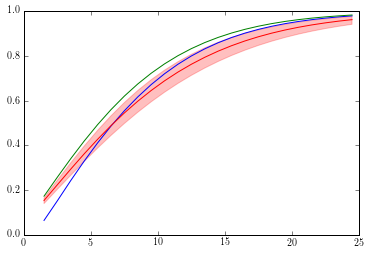

In [196]:
plt.plot(counts, power)
plt.plot(counts, pwr_2)
plt.plot(counts, pwr_3)
plt.fill_between(counts, pwr_l, pwr_h, color='r', alpha=0.25)

In [177]:
n = 2 * np.square((Z.ppf(power) + Z.ppf(0.975)) / cohen_d)
n

array([  1.01027853,   0.06680058,   0.85194056,   1.90334916,
         3.01325131,   4.13315773,   5.24876549,   6.3557181 ,
         7.45305756,   8.54106684,   9.62046722,  10.69209858,
        11.75678935,  12.81530619,  13.86833791,  14.91649454,
        15.96031257,  17.00026241,  18.03675633,  19.07015614,
        20.10077867,  21.12890349,  22.15477698,  23.17861685])

In [214]:
counts

array([  5. ,   7.5,  10. ,  12.5,  15. ,  17.5,  20. ,  22.5,  25. ,
        27.5,  30. ,  32.5,  35. ,  37.5,  40. ,  42.5,  45. ,  47.5])

In [219]:
2 * np.square(Z.ppf(power) + Z.ppf(0.975))/counts

array([ 0.226416  ,  0.2560455 ,  0.2690873 ,  0.27631176,  0.28088392,
        0.28403701,  0.28634459,  0.28810809,  0.28950074,  0.29062908,
        0.29156229,  0.29234725,  0.29301686,  0.29359492,  0.29409909,
        0.29454273,  0.29493615,  0.29528745])

In [220]:
cohen_d

0.54909520616172347

In [222]:
np.sqrt(2 * np.square(Z.ppf(power) + Z.ppf(0.975))/counts).mean()

0.53186170149084788